In [3]:
library(rtracklayer)
library(tidyverse)
library(ChrAccR)
library(motifmatchr)
library(SummarizedExperiment)
library(ggpubr)
library(patchwork)

Loading required package: GenomicRanges

Loading required package: stats4



Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.

### read all TF data: cpm, motif matching

In [4]:

deseq_dir <- "../../output/02-atac/04/deseq_data_Plate_TF_Dose/"
plotdir <- "../../plots/02-atac/10"
outdir <- "../../output/02-atac/10"

dir.create(plotdir, showWarnings = F, recursive=T)
dir.create(outdir, showWarnings = F, recursive=T)

padj_cutoff <- 0.05
log2fc_cutoff <- 0.58

In [ ]:
# read in ATAC CPM values
cpm_df <- read.csv("../../output/02-atac/01/cpm.tsv", sep=" ") # just use the cpm normalized peak count matrix
cpm_df %>% head
dim(cpm_df)

,X1_HEK293T_P1A2_SP4_d100,X2_HEK293T_P1B2_SP4_d100,X3_HEK293T_P1C2_ELF1_d100,X4_HEK293T_P1D2_ELF1_d100,X5_HEK293T_P1E2_FOXP1_d100,X6_HEK293T_P1F2_FOXP1_d100,X7_HEK293T_P1G2_GATA1_d100,X8_HEK293T_P1H2_GATA1_d100,X9_HEK293T_P1A3_SP4_d075,X10_HEK293T_P1B3_SP4_d075,⋯,X407_HEK293T_P3G11_SPI1_d005,X408_HEK293T_P3H11_SPI1_d005,X409_HEK293T_P3A12_GFP_d100,X410_HEK293T_P3B12_GFP_d100,X411_HEK293T_P3C12_tetCTCF_d100,X412_HEK293T_P3D12_tetCTCF_d100,X413_HEK293T_P3E12_GFP_d100,X414_HEK293T_P3F12_GFP_d100,X415_HEK293T_P3G12_negctl_d100,X416_HEK293T_P3H12_negctl_d100
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HEK293T_P3A12_GFP_d100_peak_1,1.588078,0.8776116,0.8770458,1.688634,2.175640,1.393018,1.558472,1.6576188,1.483490,0.425564,⋯,1.1968762,1.770908,2.7855153,1.8936426,1.1304493,1.8257871,0.7031904,1.0822624,2.313741,1.4081195
HEK293T_P3A12_GFP_d100_peak_17,6.087634,8.9955187,8.9897199,9.118624,8.857964,10.795892,8.500757,8.6564539,8.900937,5.957896,⋯,9.1760505,7.083633,9.2850511,7.5745705,7.3479207,7.9117439,9.1414749,6.8543286,7.519658,8.4487170
HEK293T_P3G8_SPI1_d075_peak_6,1.588078,3.0716405,1.0963073,1.688634,2.175640,2.263655,0.991755,2.0259786,1.483490,1.276692,⋯,0.7979174,2.361211,4.6425255,2.3670533,1.6956740,0.6085957,2.8127615,0.3607541,1.156870,0.7040597
HEK293T_P1B6_SP4_d005_peak_3,1.323399,1.7552232,2.4118761,3.714995,3.263461,3.134291,3.116944,2.2101584,2.472483,1.276692,⋯,1.1968762,1.770908,2.7855153,0.9468213,0.5652247,2.4343827,1.4063807,2.1645248,4.627482,3.5202987
HEK293T_P3G7_SPI1_d100_peak_10,2.382118,0.8776116,2.8503990,1.350907,2.020237,1.393018,1.416793,0.3683597,0.988993,1.702256,⋯,2.7927110,2.361211,0.9285051,1.4202320,0.5652247,1.2171914,NA,1.4430165,1.156870,1.4081195
HEK293T_P3F10_SPI1_d025_peak_18,2.117438,1.7552232,3.2889219,3.039541,2.952655,3.482546,3.967020,4.2361370,3.461476,2.553384,⋯,2.7927110,1.180605,3.7140204,5.2075172,0.5652247,1.8257871,0.7031904,4.3290496,NA,0.7040597


[1] 608176    252

In [ ]:
# read the motif matching results
motif.scores <- readRDS("../../output/02-atac/03/motif.scores.JASPAR2020.rds") # this is JASPAR motifs
motif.scores

if (is.null(rownames(motif.scores))){
    # read in the motif peak names
    dsa_norm <- loadDsAcc('../../output/02-atac/01/dsa_norm_rpkmlog2quantile/')
    region <- "filteredConsensus"

    Peaks <- as.data.frame(dsa_norm@coord[[region]],row.names = NULL, stringsAsFactors=FALSE) %>%
    dplyr::select(c("seqnames","start","end","name"))
    rownames(motif.scores) <- Peaks$name
    Peaks <- GRanges(Peaks)
}

class: RangedSummarizedExperiment 
dim: 608176 633 
metadata(0):
assays(3): motifScores motifMatches motifCounts
rownames(608176): HEK293T_P3A12_GFP_d100_peak_1
  HEK293T_P3A12_GFP_d100_peak_17 ...
  HEK293T_P3A12_GFP_d100_peak_1824818
  HEK293T_P2D8_ALX4_d075_peak_271879
rowData names(0):
colnames(633): MA0030.1_FOXF2 MA0031.1_FOXD1 ... MA0528.2_ZNF263
  MA0609.2_CREM
colData names(1): name

### inputs

In [5]:
# inputs
motif_code_ls <- c(
                   "ALX4"="MA0681.2_PHOX2B",
                   "ELF1"="MA0473.3_ELF1",
                   "IRF4"="MA1419.1_IRF4",
                   "KLF1"="MA0039.4_KLF4",
                   "KLF4"="MA0039.4_KLF4",
                   "LEF1"="MA0768.1_LEF1",
                  #  "NR4A1"="MA1112.2_NR4A1",
                   "OCT4"="MA1115.1_POU5F1",
                  #  "PRDM1"="MA0508.3_PRDM1",
                   "SOX2"="MA0143.4_SOX2",
                   "SP4"="MA0685.1_SP4",
                   "SPI1"="MA0080.5_SPI1",
                   "TCF3"="MA0522.3_TCF3")

group1 = "GFP_1" # reference level
region = "filteredConsensus"

i = 9
TF = names(motif_code_ls)[i]
group2 = paste0(TF, "_1")
motif_code = motif_code_ls[i]

In [129]:
# for (i in seq_along(motif_code_ls)){
#   TF = names(motif_code_ls)[i]
#   group2 = paste0(TF, "_1")
#   motif_code = motif_code_ls[i]
#   message(TF)

# }

### read TF specific ATAC CPM, motif matching, differential analysis and sensitivity analysis results

In [130]:
cpm <- cpm_df[,c(grep("GFP", colnames(cpm_df)), grep(TF, colnames(cpm_df)))]
cpm %>% head
dim(cpm)

,X81_HEK293T_P1A12_GFP_d100,X82_HEK293T_P1B12_GFP_d100,X245_HEK293T_P2A12_GFP_d100,X246_HEK293T_P2B12_GFP_d100,X409_HEK293T_P3A12_GFP_d100,X410_HEK293T_P3B12_GFP_d100,X413_HEK293T_P3E12_GFP_d100,X414_HEK293T_P3F12_GFP_d100,X209_HEK293T_P2E7_TCF3_d100,X210_HEK293T_P2F7_TCF3_d100,X217_HEK293T_P2E8_TCF3_d075,X218_HEK293T_P2F8_TCF3_d075,X225_HEK293T_P2E9_TCF3_d050,X226_HEK293T_P2F9_TCF3_d050,X233_HEK293T_P2E10_TCF3_d025,X234_HEK293T_P2F10_TCF3_d025,X241_HEK293T_P2E11_TCF3_d005,X242_HEK293T_P2F11_TCF3_d005
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HEK293T_P3A12_GFP_d100_peak_1,1.466495,1.566060,1.0934822,0.2761946,2.7855153,1.8936426,0.7031904,1.0822624,0.5449914,1.1310029,1.0151701,0.4203265,0.7844106,0.7192666,0.3483234,NA,0.3605537,0.6836667
HEK293T_P3A12_GFP_d100_peak_17,10.632089,9.983635,6.5608929,4.1429185,9.2850511,7.5745705,9.1414749,6.8543286,4.4961787,3.2516335,4.0606805,3.9230477,3.5298478,4.1957220,4.5282046,3.2295187,4.8674749,5.9820838
HEK293T_P3G8_SPI1_d075_peak_6,1.466495,1.566060,1.0934822,2.2095566,4.6425255,2.3670533,2.8127615,0.3607541,1.7712219,1.6965044,0.4350729,0.5604354,0.9151457,0.7192666,0.5224851,1.0765062,0.7211074,0.5127500
HEK293T_P1B6_SP4_d005_peak_3,2.199742,2.349091,3.2804465,2.2095566,2.7855153,0.9468213,1.4063807,2.1645248,0.4087435,0.7068768,0.7251215,0.9807619,0.9151457,1.1987777,1.0449703,1.0765062,1.2619379,1.1964168
HEK293T_P3G7_SPI1_d100_peak_10,1.466495,1.957575,1.4579762,0.5523891,0.9285051,1.4202320,NA,1.4430165,0.1362478,0.9896276,0.2900486,0.2802177,0.1307351,0.7192666,0.5224851,0.5382531,0.7211074,0.5127500
HEK293T_P3F10_SPI1_d025_peak_18,3.299614,2.544848,0.7289881,1.6571674,3.7140204,5.2075172,0.7031904,4.3290496,0.5449914,1.6965044,1.0151701,0.9807619,1.5688212,1.5584110,1.3932937,1.0765062,1.4422148,2.0510002


[1] 608176     18

In [131]:
# identify peaks containing target motif
target_motif_counts <- rowSums(motifCounts(motif.scores[,motif_code]))
subset <- motif.scores[(target_motif_counts > 0), motif_code]
subset

class: RangedSummarizedExperiment 
dim: 81964 1 
metadata(0):
assays(3): motifScores motifMatches motifCounts
rownames(81964): HEK293T_P3G8_SPI1_d075_peak_6
  HEK293T_P3A12_GFP_d100_peak_56 ...
  HEK293T_P3A12_GFP_d100_peak_1824788
  HEK293T_P3C3_KLF4_d075_peak_1358715
rowData names(0):
colnames(1): MA0522.3_TCF3
colData names(1): name

In [132]:
# read differential peaks between group 2 and group 1, filter for increased accessibility peaks only
de <- read.csv(Sys.glob(sprintf("%s/deseq_*%s_vs_*%s_%s_full.tsv", deseq_dir, group2, group1, region)), sep = "\t")
de <- de %>% dplyr::filter((log2FoldChange > log2fc_cutoff) & (padj < padj_cutoff))
rownames(de) <- de$name
dim(de)

[1] 63736    21

In [ ]:
# read sensitivity data
t <- read.csv(sprintf("%s/sensitivity_%s_log2fc0.58_fit.csv",outdir, TF), row.names = 1)
t$delta_res_lin_hill <- t$res_linear - t$res_hill
t %>% head
dim(t)

,m,b,res_linear,h,ka,res_hill,h_pval,ka_pval,delta_res_lin_hill
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HEK293T_P1A10_BACH2_d025_peak_105924,1.3032951,0.000239392,2.8828061,3.690300,3.340878e-01,2.8485184,0.4338552,0.046135606,0.03428768
HEK293T_P1A10_BACH2_d025_peak_109919,0.9598820,0.219870733,3.2060313,0.108200,1.510598e-09,1.8591335,0.9369398,0.996689311,1.34689780
HEK293T_P1A10_BACH2_d025_peak_114520,0.9103449,0.212240151,2.8185247,9.998946,4.891603e-02,1.3890052,0.9999982,0.999917848,1.42951950
HEK293T_P1A10_BACH2_d025_peak_116188,1.1407902,0.054062955,2.7347082,3.903583,2.995175e-01,2.5576599,0.4959816,0.029896831,0.17704828
HEK293T_P1A10_BACH2_d025_peak_128406,1.0832966,0.152408607,3.0683201,9.996757,5.936139e-02,1.6040179,0.9999886,0.999933521,1.46430220
HEK293T_P1A10_BACH2_d025_peak_129513,1.1419086,0.021685551,0.6631482,2.573146,3.118085e-01,0.5980205,0.1037434,0.001235907,0.06512767


[1] 63252     9

In [134]:
# add meta: is sensitive 
rowData(subset)["sensitive"] <- "No"
rowData(subset)[(rownames(subset) %in% de$name),"sensitive"] <- "Yes"
table(rowData(subset)$sensitive)


   No   Yes 
52252 29712 

In [135]:
# add meta: is saturating/nonsaturating sensitive
rowData(subset)[rownames(subset)[rowData(subset)$sensitive=="Yes"], "saturating"] <- "No"
#tmp <- t[(t$delta_res_lin_hill > 0) & (t$ka_pval < 0.1) & (t$h_pval < 0.1),]
tmp <- t[(t$delta_res_lin_hill > 0),]
rowData(subset)[(rownames(subset) %in% rownames(tmp)),"saturating"] <- "Yes"
table(rowData(subset)$saturating)


   No   Yes 
 1662 28050 

In [136]:
# add meta: EC50 and hill values for saturating sensitive peaks
tmp <- rownames(subset)[rowData(subset)$sensitive=="Yes"]
rowData(subset)[tmp, "EC50"] <- t[tmp,"ka"]
rowData(subset)[tmp, "h"] <- t[tmp,"h"]

# add meta: is open/closed nonsensitive
rowData(subset)[rownames(subset)[rowData(subset)$sensitive=="No"], "state"] <- "closed" # initialize all nonsensitive peaks to closed
tmp <- cpm[rowMeans(cpm)>1,]

rowData(subset)[(rownames(subset) %in% rownames(tmp)) & (rowData(subset)$sensitive=="No"),"state"] <- "open"
table(rowData(subset)$state)


closed   open 
 36135  16117 

In [137]:
# add meta: group
rowData(subset)$group <- NA
rowData(subset)[which(rowData(subset)$saturating=="Yes"), "group"] <- "saturating sensitive"
rowData(subset)[which(rowData(subset)$saturating=="No"), "group"] <- "nonsaturating sensitive"
rowData(subset)[which(rowData(subset)$state=="open"), "group"] <- "open nonsensitive"
rowData(subset)[which(rowData(subset)$state=="closed"), "group"] <- "closed nonsensitive"
rowData(subset)$group <- factor(rowData(subset)$group, levels=c("saturating sensitive","nonsaturating sensitive",
                                                               "open nonsensitive","closed nonsensitive" ))

In [138]:
rowData(subset)$group %>% table

.
   saturating sensitive nonsaturating sensitive       open nonsensitive 
                  28050                    1662                   16117 
    closed nonsensitive 
                  36135 

In [139]:
write.table(rowData(subset), paste0(outdir, "/", TF,"_motif_containing_peak_meta.tsv"), sep="\t", quote=F)

## plot peak counts in each sensitivity group

In [6]:
all_meta <- list()
for (TF in names(motif_code_ls)){
    print(TF)
    df <- read.table(paste0(outdir, "/", TF,"_motif_containing_peak_meta.tsv"), sep="\t")
    all_meta[[TF]] <- table(df$group) %>% as.data.frame %>% dplyr::rename(group="Var1", npeak="Freq") %>% dplyr::mutate(TF=TF)
}


[1] "ALX4"
[1] "ELF1"
[1] "IRF4"
[1] "KLF1"
[1] "KLF4"
[1] "LEF1"
[1] "OCT4"
[1] "SOX2"
[1] "SP4"
[1] "SPI1"
[1] "TCF3"


In [7]:
all_meta <- do.call(rbind, all_meta)
rownames(all_meta) <- NULL

In [15]:
#ratio of nonsaturating peaks
df1 <- all_meta %>% dplyr::group_by(TF) %>% dplyr::summarise(allpeak=sum(npeak))
df2 <- all_meta %>% dplyr::filter(group=="nonsaturating sensitive")
df1
df2
df3 <- merge(df1, df2, by="TF")
df3 %>% dplyr::mutate(ratio=npeak/allpeak) %>% dplyr::arrange(desc(ratio))


TF,allpeak
<chr>,<int>
ALX4,69952
ELF1,77559
IRF4,26962
KLF1,167232
KLF4,167232
LEF1,54563
OCT4,53467
SOX2,37251
SP4,63230


group,npeak,TF
<fct>,<int>,<chr>
nonsaturating sensitive,641,ALX4
nonsaturating sensitive,321,ELF1
nonsaturating sensitive,71,IRF4
nonsaturating sensitive,5215,KLF1
nonsaturating sensitive,5005,KLF4
nonsaturating sensitive,1136,LEF1
nonsaturating sensitive,1509,OCT4
nonsaturating sensitive,34,SOX2
nonsaturating sensitive,140,SP4


TF,allpeak,group,npeak,ratio
<chr>,<int>,<fct>,<int>,<dbl>
KLF1,167232,nonsaturating sensitive,5215,0.0311842231
KLF4,167232,nonsaturating sensitive,5005,0.0299284826
OCT4,53467,nonsaturating sensitive,1509,0.0282230161
SPI1,139176,nonsaturating sensitive,3719,0.0267215612
LEF1,54563,nonsaturating sensitive,1136,0.0208199696
TCF3,81964,nonsaturating sensitive,1662,0.0202771949
ALX4,69952,nonsaturating sensitive,641,0.0091634263
ELF1,77559,nonsaturating sensitive,321,0.0041387847
IRF4,26962,nonsaturating sensitive,71,0.0026333358


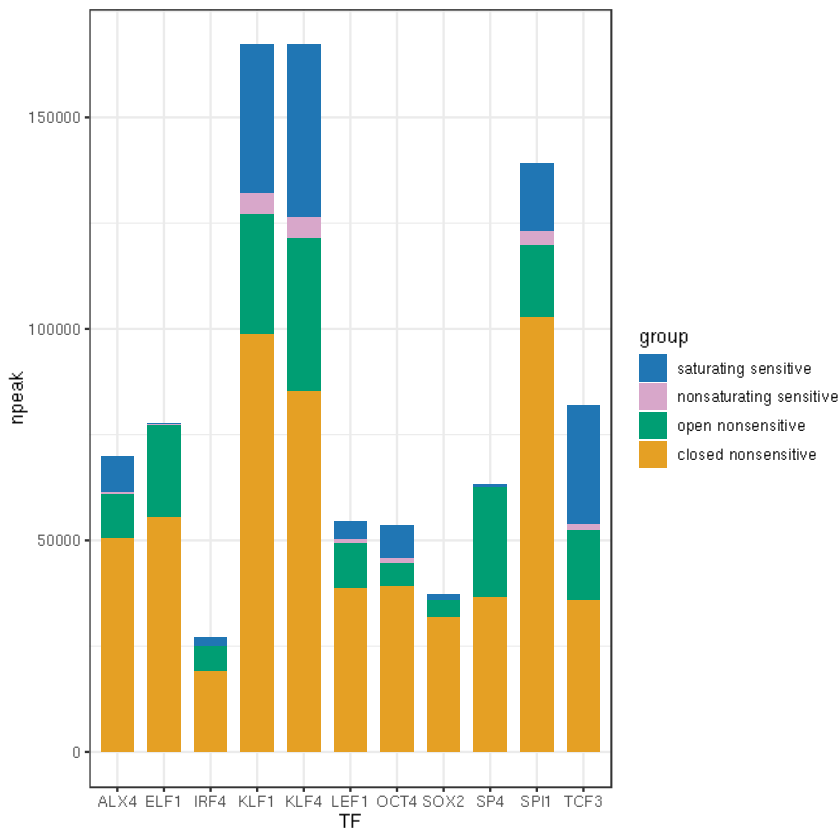

In [29]:
group_colors <- c("saturating sensitive"="#2076B4",
                  "nonsaturating sensitive"="#D8A7CA",
                  "open nonsensitive"="#009E73",
                  "closed nonsensitive"="#E5A024")
all_meta$group <- factor(all_meta$group, levels=c("saturating sensitive", "nonsaturating sensitive", "open nonsensitive", "closed nonsensitive"))
ggplot(all_meta, aes(x=TF, y=npeak, fill=group)) + geom_col(width=0.7) + scale_fill_manual(values=group_colors) + theme_bw()
ggsave(paste0(plotdir, "/all_tf_npeak_pergroup.pdf"), width=14, height=6)